### CHEME 5660: Calculating the Price of Call and Put Options using a Binomial Lattice Model

<img src="./figs/Fig-Binomial-Lattice-Schematic.pdf" style="margin:auto; width:30%"/>

### Binomial lattice model
A binomial lattice model assumes that each discrete time increment, the state of the system, e.g., the share price of equity, the spot rate, etc., can either increase by a factor $u$ with probability $p$ or decrease by a factor $d$ with probability $(1-p)$. Different models can be developed for the specific values of the tuple $(u,d,p)$. One particular model is the Cox, Ross, and Rubinstein (CRR) model:

* [Cox, J. C.; Ross, S. A.; Rubinstein, M. (1979). "Option pricing: A simplified approach". Journal of Financial Economics. 7 (3): 229. CiteSeerX 10.1.1.379.7582. doi:10.1016/0304-405X(79)90015-1](https://www.sciencedirect.com/science/article/pii/0304405X79900151?via%3Dihub)

#### Cox, Ross and Rubinstein (CRR) model
The [CRR binomial lattice model](https://en.wikipedia.org/wiki/Binomial_options_pricing_model) was initially developed for options pricing in 1979. However, one of the critical aspects of estimating an option’s price is calculating the underlying asset’s share price. Thus, let's use the [CRR model](https://en.wikipedia.org/wiki/Binomial_options_pricing_model) to compute the share price of a stock, Advanced Micro Devices, Inc, with the ticker symbol [AMD](https://finance.yahoo.com/quote/AMD?.tsrc=applewf). In the [CRR model](https://en.wikipedia.org/wiki/Binomial_options_pricing_model) model, the `up` and `down` moves are symmetric:

$$ud = 1$$

where the magnitude of an `up` move $u$ is given by:

$$u = \exp(\sigma\sqrt{\Delta{T}})$$

The quantity $\sigma$ denotes a _volatility parameter_, and $\Delta{T}$ represents the time step. The probability $p$ of an `up` move in a [CRR model](https://en.wikipedia.org/wiki/Binomial_options_pricing_model) is given by:

$$p = \frac{\exp(\mu\Delta{T}) - d}{u - d}$$

where $\mu$ denotes a _return parameter_. In the [CRR model](https://en.wikipedia.org/wiki/Binomial_options_pricing_model) model paradigm, the return parameter $\mu$ and the volatility parameter $\sigma$ take on common values:
* The return parameter $\mu$ is a _risk-free_ rate of return; the _risk-free_ rate $\bar{r}$ can be approximated by the [yield on T = 10-year United States Treasury debt security](https://ycharts.com/indicators/10_year_treasury_rate). 
* The volatility parameter $\sigma$ is the [implied volatility](https://www.investopedia.com/terms/i/iv.asp); the implied volatility is the market's view of the likelihood of changes in a given security's price.

### Lab setup
The code block below installs (and loads) any [Julia](https://julialang.org) packages that we need to complete the calculations.

In [1]:
import Pkg; Pkg.activate("."); Pkg.resolve(); Pkg.instantiate();

  Activating project at `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/labs/lab-5-CRR-American-Option-Pricing`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/labs/lab-5-CRR-American-Option-Pricing/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Markets-Mayhem-Example-Notebooks/labs/lab-5-CRR-American-Option-Pricing/Manifest.toml`


In [2]:
# packages that we need -
using PQEcolaPoint
using DataFrames
using CSV
using Statistics
using Dates
using Plots
using Colors

# paths -
const _ROOT = pwd();
const _PATH_TO_DATA = joinpath(_ROOT,"data");
const _PATH_TO_FIGS = joinpath(_ROOT,"figs");

In [3]:
df = CSV.read(joinpath(_PATH_TO_DATA,"AMD-DTE-58-options-exp-2022-12-16-monthly-near-the-money-stacked-10-18-2022.csv"), DataFrame);

### Sample CRR model calculation

In [4]:
# Setup some constants -
B = 365.0    # Days in a year (all values are per year)
DTE = 58.0   # Days to expiration
μ = 0.04065  # risk free rate: https://www.cnbc.com/quotes/US10Y
L = 100;     # number of levels on the tree
Sₒ = 57.92;  # AMD close price on 10/18/22

In [5]:
# Set the volatility -
IV = 57.3    # AMD implied volatility for K = 62 USD/share Put
σₘ = (IV/100.0);

In [6]:
# build lattice model -
sample_lattice_model = build(CRRLatticeModel; number_of_levels=(L+1), Sₒ = Sₒ, σ = σₘ, μ = μ, T = (DTE/B));

In [7]:
# what is the contract?
sample_put_contract = PutContractModel()
sample_put_contract.ticker = "AMD"
sample_put_contract.expiration_date = Date(2022, 12, 16)
sample_put_contract.strike_price = 65.0
sample_put_contract.premium = 0.0
sample_put_contract.number_of_contracts = 1
sample_put_contract.direction = 1

# what is the premimum?
𝒫 = premium(sample_put_contract, sample_lattice_model)

# print out the premium -
println("The premium equals 𝒫 = $(round(𝒫, digits=2)) USD/share")

The premium equals 𝒫 = 9.57 USD/share


### Calculations

#### a) How does option premium vary with the strike price?
__Todo__: select the `Put` contracts from the [DataFrame](https://dataframes.juliadata.org/stable/) `df` and simulate all the strikes using a `CRR` model.

In [8]:
# select the data for the Puts -
df_put = filter(:Type => x->x == "Put", df);

# Update my DTE -
DTE_58 = 58.0;

# how many puts do we have?
number_of_puts = nrow(df_put);

# init some storage -
data_array_part_a = Array{Float64,2}(undef, number_of_puts, 7);

# main loop - 
for i ∈ 1:number_of_puts
    
    # get the strike price, and the IV from the data set -
    K = df_put[i,:Strike];
    IV = df_put[i,:IV];
    
    # Build a put contract model -
    sample_put_contract = PutContractModel()
    sample_put_contract.ticker = "AMD"
    sample_put_contract.expiration_date = Date(2022, 12, 16)
    sample_put_contract.strike_price = K
    sample_put_contract.premium = 0.0
    sample_put_contract.number_of_contracts = 1
    sample_put_contract.direction = 1

    # build a lattice w/the current IV -
    sample_lattice_model = build(CRRLatticeModel; number_of_levels=(L+1), Sₒ = Sₒ, σ = IV, μ = μ, T = (DTE_58/B));
    
    # compute the premium -
    premium_value = premium(sample_put_contract, sample_lattice_model)
    
    # capture -
    data_array_part_a[i,1] = Sₒ
    data_array_part_a[i,2] = K
    data_array_part_a[i,3] = max(K - Sₒ, 0)
    data_array_part_a[i,4] = premium_value
    data_array_part_a[i,5] = df_put[i,:Bid];
    data_array_part_a[i,6] = df_put[i,:Ask];
    data_array_part_a[i,7] = IV;
end

In [9]:
data_array_part_a

17×7 Matrix{Float64}:
 57.92   25.0   0.0    0.103771   0.09   0.11  1.028
 57.92   30.0   0.0    0.188524   0.2    0.21  0.911
 57.92   35.0   0.0    0.377358   0.38   0.4   0.827
 57.92   40.0   0.0    0.75343    0.76   0.78  0.769
 57.92   45.0   0.0    1.41853    1.41   1.44  0.715
 57.92   50.0   0.0    2.47407    2.5    2.53  0.667
 57.92   55.0   0.0    4.13586    4.15   4.2   0.632
 57.92   60.0   2.08   6.46927    6.5    6.55  0.597
 57.92   65.0   7.08   9.56816    9.5    9.75  0.573
 57.92   70.0  12.08  13.3651    13.2   13.65  0.561
 57.92   75.0  17.08  17.6209    17.5   17.85  0.547
 57.92   80.0  22.08  22.3135    22.2   22.5   0.558
 57.92   85.0  27.08  27.2928    26.8   27.45  0.629
 57.92   90.0  32.08  32.1635    31.75  32.4   0.642
 57.92   95.0  37.08  37.3504    36.75  37.4   0.79
 57.92  100.0  42.08  42.4233    41.75  43.2   0.878
 57.92  105.0  47.08  47.5428    46.75  48.45  0.975

#### b) How does option premium vary with the length of the contract?
__Todo__: Compare the price of `Put` contracts (with the same strikes) for T = 30 days to expiration (DTE) versus T = 58 days to expiration.

In [10]:
# load the DTE = 30 data set -
df_DTE_30 = CSV.read(joinpath(_PATH_TO_DATA,"AMD-DTE-30-options-exp-2022-11-18-monthly-near-the-money-stacked-10-18-2022.csv"), DataFrame);

In [11]:
# Filter the DTE = 30 data set to look at Puts -
df_put_DTE_30 = filter(:Type => x->x == "Put", df_DTE_30);

# Update my DTE value -
DTE_30 = 30.0

# how many puts do we have?
number_of_puts = nrow(df_put);

# init some storage -
data_array_part_b = Array{Float64,2}(undef, number_of_puts, 7);

# main loop - 
for i ∈ 1:number_of_puts
    
    # get the strike price, and the IV from the data set -
    K = df_put_DTE_30[i,:Strike];
    IV = df_put_DTE_30[i,:IV];
    
    # Build a put contract model -
    sample_put_contract = PutContractModel()
    sample_put_contract.ticker = "AMD"
    sample_put_contract.expiration_date = Date(2022, 12, 16)
    sample_put_contract.strike_price = K
    sample_put_contract.premium = 0.0
    sample_put_contract.number_of_contracts = 1
    sample_put_contract.direction = 1

    # build a lattice w/the current IV -
    sample_lattice_model = build(CRRLatticeModel; number_of_levels=(L+1), Sₒ = Sₒ, σ = IV, μ = μ, T = (DTE_30/B));
    
    # compute the premium -
    premium_value = premium(sample_put_contract, sample_lattice_model)
    
    # capture -
    data_array_part_b[i,1] = Sₒ
    data_array_part_b[i,2] = K
    data_array_part_b[i,3] = max(K - Sₒ, 0)
    data_array_part_b[i,4] = premium_value
    data_array_part_b[i,5] = df_put_DTE_30[i,:Bid];
    data_array_part_b[i,6] = df_put_DTE_30[i,:Ask];
    data_array_part_b[i,7] = IV;
end

In [12]:
data_array_part_b

17×7 Matrix{Float64}:
 57.92   25.0   0.0    0.0366691   0.03   0.04  1.241
 57.92   30.0   0.0    0.0759612   0.07   0.08  1.089
 57.92   35.0   0.0    0.143105    0.15   0.16  0.95
 57.92   40.0   0.0    0.310567    0.31   0.32  0.85
 57.92   45.0   0.0    0.690518    0.7    0.71  0.775
 57.92   50.0   0.0    1.50292     1.51   1.52  0.721
 57.92   55.0   0.0    2.96887     2.99   3.0   0.676
 57.92   60.0   2.08   5.27672     5.3    5.35  0.637
 57.92   65.0   7.08   8.56427     8.55   8.65  0.608
 57.92   70.0  12.08  12.6719     12.55  12.85  0.598
 57.92   75.0  17.08  17.2285     17.05  17.5   0.579
 57.92   80.0  22.08  22.1264     22.05  22.3   0.615
 57.92   85.0  27.08  27.1788     26.75  27.3   0.756
 57.92   90.0  32.08  32.3216     31.8   32.35  0.936
 57.92   95.0  37.08  37.092      36.75  37.45  0.819
 57.92  100.0  42.08  42.3604     41.85  42.7   1.128
 57.92  105.0  47.08  47.4172     46.7   48.2   1.237

In [13]:
# One additional hypothetical case -
# Filter the DTE = 30 data set to look at Puts -
df_put_DTE_30 = filter(:Type => x->x == "Put", df_DTE_30);

# Update my DTE value -
DTE_30 = 10.0

# how many puts do we have?
number_of_puts = nrow(df_put);

# init some storage -
data_array_part_c = Array{Float64,2}(undef, number_of_puts, 7);

# main loop - 
for i ∈ 1:number_of_puts
    
    # get the strike price, and the IV from the data set -
    K = df_put_DTE_30[i,:Strike];
    IV = df_put_DTE_30[i,:IV];
    
    # Build a put contract model -
    sample_put_contract = PutContractModel()
    sample_put_contract.ticker = "AMD"
    sample_put_contract.expiration_date = Date(2022, 12, 16)
    sample_put_contract.strike_price = K
    sample_put_contract.premium = 0.0
    sample_put_contract.number_of_contracts = 1
    sample_put_contract.direction = 1

    # build a lattice w/the current IV -
    sample_lattice_model = build(CRRLatticeModel; number_of_levels=(L+1), Sₒ = Sₒ, σ = IV, μ = μ, T = (DTE_30/B));
    
    # compute the premium -
    premium_value = premium(sample_put_contract, sample_lattice_model)
    
    # capture -
    data_array_part_c[i,1] = Sₒ
    data_array_part_c[i,2] = K
    data_array_part_c[i,3] = max(K - Sₒ, 0)
    data_array_part_c[i,4] = premium_value
    data_array_part_c[i,5] = df_put_DTE_30[i,:Bid];
    data_array_part_c[i,6] = df_put_DTE_30[i,:Ask];
    data_array_part_c[i,7] = IV;
end

#### c) How does option premium vary with the Implied Volatility (IV)?
__Todo__: Select a `Put` contract from the [DataFrame](https://dataframes.juliadata.org/stable/) `df` and simulate what happens to the price if we increase, or decrease the IV (all else held constant).

In [14]:
# lets pick K = 65 Put DTE = 58 and see what happens to the price if we ± the Implied Volatility
ϵ = 0.20; # size of perturbation
IVₒ = df_put[9,:IV]

# Build a contract model -
sens_calc_put_contract = PutContractModel()
sens_calc_put_contract.ticker = "AMD"
sens_calc_put_contract.expiration_date = Date(2022, 12, 16)
sens_calc_put_contract.strike_price = 65.0
sens_calc_put_contract.premium = 0.0
sens_calc_put_contract.number_of_contracts = 1
sens_calc_put_contract.direction = 1

# Up lattice -
IV_up = IVₒ*(1+ϵ);
up_lattice_model = build(CRRLatticeModel; number_of_levels=(L+1), Sₒ = Sₒ, σ = IV_up, μ = μ, T = (DTE_58/B));

# Down lattice -
IV_down = IVₒ*(1-ϵ);
down_lattice_model = build(CRRLatticeModel; number_of_levels=(L+1), Sₒ = Sₒ, σ = IV_down, μ = μ, T = (DTE_58/B));

# compute the two prices -
P_base = data_array_part_a[9,4];
P_up = premium(sens_calc_put_contract, up_lattice_model)
P_down = premium(sens_calc_put_contract, down_lattice_model);

# print -
println("P_base = $(P_base), P_up = $(P_up) and P_down = $(P_down)")

P_base = 9.568160016096481, P_up = 10.547625084807027 and P_down = 8.61523114767052


#### d) Live option price calculation
Let's select a ticker, contract type, expiration and a strike price and compare the CRR model calculation against live data.

In [21]:
# Steps -

# setup constants -
DTE_demo = 58.0
IV_demo = (58.54/100);
Sₒ_demo = 55.58
μ̂ = 0.0423 # update to risk free rate 

# Build a contract model -
demo_put_contract = PutContractModel()
demo_put_contract.ticker = "AMD"
demo_put_contract.expiration_date = Date(2022, 12, 16)
demo_put_contract.strike_price = 65.0
demo_put_contract.premium = 0.0
demo_put_contract.number_of_contracts = 1
demo_put_contract.direction = 1

# Build a lattice model -
demo_lattice_model = build(CRRLatticeModel; number_of_levels=(L+1), Sₒ = Sₒ, σ = IV_demo, μ = μ̂, T = (DTE_demo/B));
    
# Calculate the premium -
premium_value = premium(demo_put_contract, demo_lattice_model)

# print -
println("The premium equals 𝒫 = $(round(premium_value, digits=2)) USD/share")

The premium equals 𝒫 = 9.67 USD/share


#### e) Visualize

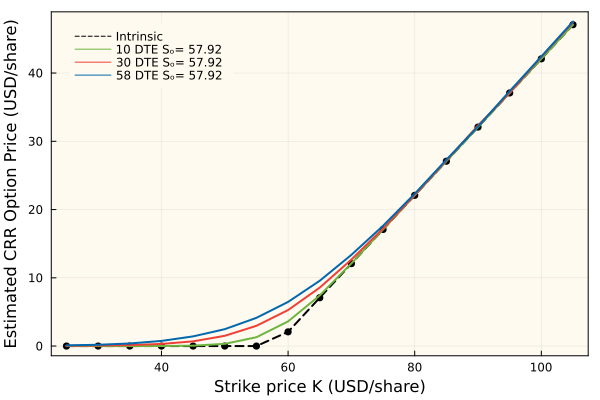

In [16]:
# make a plot of the value of the option -
plot(data_array_part_b[:,2],data_array_part_b[:,3], lw=2, label="Intrinsic", legend=:topleft, bg="floralwhite", background_color_outside="white", framestyle = :box, fg_legend = :transparent, c=:black, ls=:dash)
scatter!(data_array_part_b[:,2],data_array_part_b[:,3],c=:black, label="")
plot!(data_array_part_c[:,2],data_array_part_c[:,4], lw=2,label="10 DTE Sₒ= 57.92", c=colorant"#6EB43F")
plot!(data_array_part_b[:,2],data_array_part_b[:,4], lw=2,label="30 DTE Sₒ= 57.92", c=colorant"#EF4035")
plot!(data_array_part_a[:,2],data_array_part_a[:,4], lw=2,label="58 DTE Sₒ= 57.92", c=colorant"#0068AC")


# add labels -
xlabel!("Strike price K (USD/share)", fontsize=18)
ylabel!("Estimated CRR Option Price (USD/share)", fontsize=18)

# uncomment me to save figure -
# savefig(joinpath(_PATH_TO_FIGS, "Fig-Intrinsic-Extrinsic-Value-Put.pdf"));